In [4]:
import numpy as np
import seaborn as sns; sns.set()
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 10]

font = {'size'   : 15, }
axes = {'labelsize': 'large', 'titlesize': 'large'}

mpl.rc('font', **font)
mpl.rc('axes', **axes)

import pandas as pd
import data_utils


In [5]:
# Paths to data csvs
wd = "/home/behzad/Documents/barnes_lab/cplusplus_software/speed_test/repressilator/cpp"
data_dir = wd + "/output/two_species_big_3/Population_0"
distances_path = data_dir + "/distances.csv"
eigenvalues_path = data_dir + "/eigenvalues_do_fsolve_state.csv"
model_space_report_path = data_dir + "/model_space_report.csv"
sum_stdev_path = data_dir + "/sum_stdev.csv"
time_stab_path = data_dir + "/time_to_stab.csv"

In [6]:
# Load dataframes
distances_df = pd.read_csv(distances_path)
eigenvalues_df = pd.read_csv(eigenvalues_path)
sum_stdev_df = pd.read_csv(sum_stdev_path)
time_stab_df = pd.read_csv(time_stab_path)

# Make distances numeric
distances_df = data_utils.distances_pre_processing(distances_df)

In [7]:
# Join eigenvalues and distances on the simulation index, batch number and model_ref
joint_df = pd.merge(left=eigenvalues_df, right=distances_df, how='inner', on=['sim_idx', 'batch_num', 'model_ref'])
joint_df.reset_index()

# Join eigenvalues and distances on the simulation index, batch number and model_ref
joint_df = pd.merge(left=joint_df, right=sum_stdev_df, how='inner', on=['sim_idx', 'batch_num', 'model_ref'])
joint_df.reset_index()

joint_df = pd.merge(left=joint_df, right=time_stab_df, how='inner', on=['sim_idx', 'batch_num', 'model_ref'])
joint_df.reset_index()


joint_df = data_utils.make_max_eig(joint_df)
joint_df = data_utils.get_conjugate_pairs(joint_df)
joint_df = data_utils.all_real_eigs(joint_df)

# all_sims = joint_df
# full_term_sims = joint_df.loc[joint_df['integ_error'].isnull()]
# early_termination_sims = joint_df.loc[~joint_df['integ_error'].isnull()]
# only_real_part_sims = joint_df.loc[joint_df['all_real_eigs'] == True]
# complex_sims = joint_df.loc[joint_df['all_real_eigs'] == False]
# negative_part_sims = joint_df.loc[joint_df['all_negative_eigs'] == True]
# positive_part_sims = joint_df.loc[joint_df['all_positive_eigs'] == True]

# positive_real_part_sims = joint_df.loc[joint_df['all_positive_eigs'] == True]

# only_real_and_full_term = joint_df.loc[joint_df['integ_error'].isnull() &
#                                             (joint_df['all_real_eigs'] == True)]




[None, None, (-1, 1654015550418.7283)]

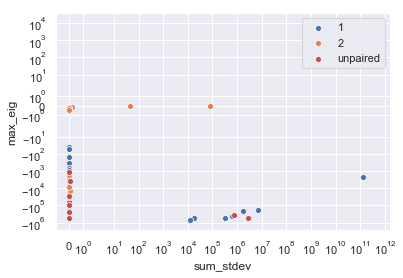

In [8]:
full_term_sims = joint_df.loc[(joint_df['integ_error'].isnull()) & (joint_df['fsolve_error'] == 1)]

full_term_sims_paired_one = full_term_sims.loc[(full_term_sims['num_conj_pairs'] ==1)]
full_term_sims_paired_two = full_term_sims.loc[(full_term_sims['num_conj_pairs'] ==2)]
full_term_sims_paired_three = full_term_sims.loc[(full_term_sims['num_conj_pairs'] ==3)]

full_term_sims_unpaired = full_term_sims.loc[(full_term_sims['num_conj_pairs'] == 0)]

ax = sns.scatterplot(x='sum_stdev', y='max_eig', data=full_term_sims_paired_one, label='1')
ax = sns.scatterplot(x='sum_stdev', y='max_eig', data=full_term_sims_paired_two, label='2')
ax = sns.scatterplot(x='sum_stdev', y='max_eig', data=full_term_sims_paired_three, label='3')
ax = sns.scatterplot(x='sum_stdev', y='max_eig', data=full_term_sims_unpaired, label='unpaired')

ax.set(xscale='symlog', yscale='symlog', xlim=(-1, None))



[None, (-1, 5293.498577316993)]

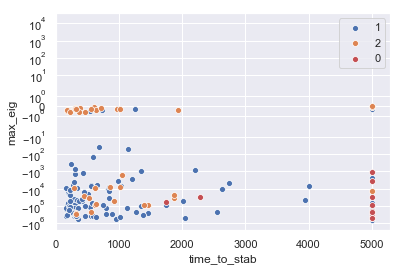

In [9]:
ax = sns.scatterplot(x='time_to_stab', y='max_eig', data=full_term_sims_paired_one, label='1')
ax = sns.scatterplot(x='time_to_stab', y='max_eig', data=full_term_sims_paired_two, label='2')
ax = sns.scatterplot(x='time_to_stab', y='max_eig', data=full_term_sims_paired_three, label='3')
ax = sns.scatterplot(x='time_to_stab', y='max_eig', data=full_term_sims_unpaired, label='0')

ax.set(yscale='symlog', xlim=(-1, None))
